# Importing the Dependencies

Importing the Dependencies:


Numpy --> Allows several mathematical operations

Pandas --> Useful for data processing and analysis

Matplotlib --> Useful for making plots and graphs

Sci-Kit Learn --> Provides a selection of efficient tools for ML and statistical modeling

In [1]:
# Importing the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Data Collection and Analysis

In [2]:
# Setting up seaborn theme
sns.set()

In [3]:
# Loading the diabetes dataset to the pandas DataFrame
diabetes_dataset = pd.read_csv("C:/Users/dtany/Desktop/Deploying_Machine_Learning_Model_Project/diabetes.csv")

In [4]:
# Printing the first 5 rows of the dataset
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
# Number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
# Getting the statistical measures of the data
diabetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
# Getting the number of non-diabetic and diabetic patients
diabetes_dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [8]:
diabetes_dataset.groupby("Outcome").mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [9]:
# Checking for missing values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis with Pandas-Profiling

In [10]:
profile = ProfileReport(diabetes_dataset, title = "Diabetes Dataset Report")

In [11]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Separating the data (features) and labels (target)
X = diabetes_dataset.drop(columns = "Outcome", axis = 1)
Y = diabetes_dataset["Outcome"]

In [13]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [14]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Standardization

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(X)

StandardScaler()

In [17]:
standardized_data = scaler.transform(X)

In [18]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [19]:
X = standardized_data
Y = diabetes_dataset["Outcome"]

In [20]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [21]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test Split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# SVM Kernels (Linear, Poly, RBF, Sigmoid) Evaluation

In [24]:
# Training the SVM model and evaluating the model for all the kernel functions
# accuracy score on the training data

for k in ("linear", "poly", "rbf", "sigmoid"):
    classifier = svm.SVC(kernel = k)
    classifier.fit(X_train, Y_train)
    
    X_train_prediction = classifier.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    
    print(k)
    print("Accuarcy score of the training data : ", training_data_accuracy)

linear
Accuarcy score of the training data :  0.7638436482084691
poly
Accuarcy score of the training data :  0.7980456026058632
rbf
Accuarcy score of the training data :  0.8192182410423453
sigmoid
Accuarcy score of the training data :  0.6677524429967426


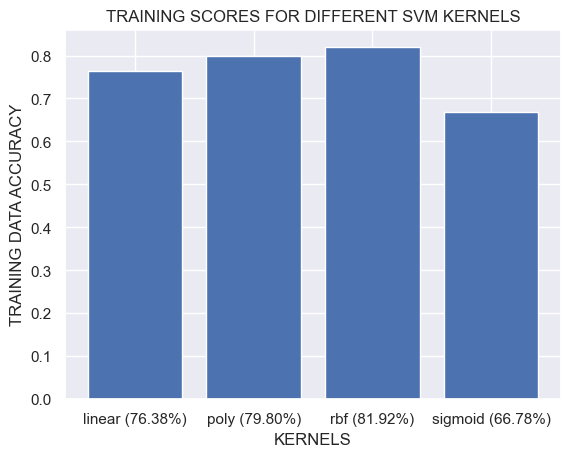

In [25]:
# Bar chart representation of the training accuracy score for the respective kernels 
kernels = ["linear (76.38%)", "poly (79.80%)", "rbf (81.92%)", "sigmoid (66.78%)"]
training_score = [0.7638436482084691, 0.7980456026058632, 0.8192182410423453, 0.6677524429967426]

plt.bar(kernels, training_score)
plt.title("TRAINING SCORES FOR DIFFERENT SVM KERNELS")
plt.xlabel("KERNELS")
plt.ylabel("TRAINING DATA ACCURACY")
plt.show()

In [26]:
# Training SVM model and evaluating the model for all the kernel functions
# accuracy score on the test data

for k in ("linear", "poly", "rbf", "sigmoid"):
    classifier = svm.SVC(kernel = k)
    classifier.fit(X_train, Y_train)
    
    X_test_prediction = classifier.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
    recall = recall_score(X_test_prediction,Y_test)
    f1 = f1_score(X_test_prediction,Y_test)
    
    print(k)
    print("Accuracy score of the test data : ", test_data_accuracy)
    print("Recall : ", recall)
    print("F1 : ", f1)

linear
Accuracy score of the test data :  0.8246753246753247
Recall :  0.7631578947368421
F1 :  0.6823529411764706
poly
Accuracy score of the test data :  0.7597402597402597
Recall :  0.7272727272727273
F1 :  0.46376811594202894
rbf
Accuracy score of the test data :  0.7922077922077922
Recall :  0.7027027027027027
F1 :  0.6190476190476191
sigmoid
Accuracy score of the test data :  0.7792207792207793
Recall :  0.6326530612244898
F1 :  0.6458333333333333


In [27]:
# Evaluation of other metrics (specificity) for kernel assessment
for k in ("linear", "poly", "rbf", "sigmoid"):
    classifier = svm.SVC(kernel = k)
    classifier.fit(X_train, Y_train)
    
    X_test_prediction = classifier.predict(X_test)
    
    # Define true labels and predicted labels
    y_true = Y_test
    y_pred = X_test_prediction
    
    # Generate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calculate specificity
    specificity = tn / (tn + fp)
    
    print(k)
    print(specificity)

linear
0.9158878504672897
poly
0.9439252336448598
rbf
0.897196261682243
sigmoid
0.8317757009345794


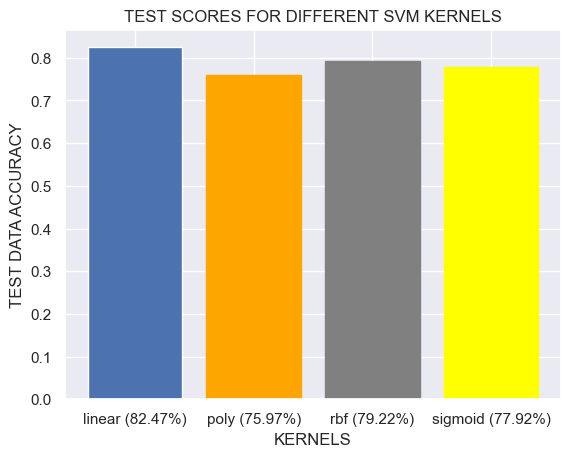

In [28]:
# Bar chart representation of the test accuracy score for the respective kernels 
kernels = ["linear (82.47%)", "poly (75.97%)", "rbf (79.22%)", "sigmoid (77.92%)"]
test_score = [0.8246753246753247, 0.7597402597402597, 0.7922077922077922, 0.7792207792207793]

barlist = plt.bar(kernels, test_score)
barlist[1].set_color("orange")
barlist[2].set_color("grey")
barlist[3].set_color("yellow")

plt.title("TEST SCORES FOR DIFFERENT SVM KERNELS")
plt.xlabel("KERNELS")
plt.ylabel("TEST DATA ACCURACY")
plt.show()

AUC-ROC score: 0.8039927404718693


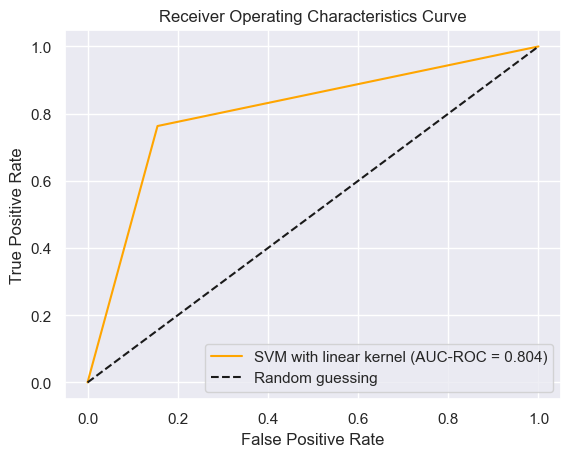

In [29]:
# Plotting ROC_AUC curves for the respective kernels
classifier = svm.SVC(kernel = "linear", probability=True)
classifier.fit(X_train, Y_train)
    
X_test_prediction = classifier.predict(X_test)[:]

# Compute the AUC-ROC score
auc_roc = roc_auc_score(X_test_prediction, Y_test)
print("AUC-ROC score:", auc_roc)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(X_test_prediction, Y_test)

# Plot the ROC curve
plt.plot(fpr, tpr, label='SVM with linear kernel (AUC-ROC = {:.3f})'.format(auc_roc),  color = "orange")
plt.plot([0, 1], [0, 1], 'k--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend()
plt.show()

# Training the linear kernel SVM model

In [30]:
classifier = svm.SVC(kernel = "linear")

In [31]:
# Training the support vector machine classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation

# Accuracy Score

In [32]:
# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [33]:
print("Accuarcy score of the training data : ", training_data_accuracy)

Accuarcy score of the training data :  0.7638436482084691


In [34]:
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [35]:
print("Accuracy score of the test data : ", test_data_accuracy)

Accuracy score of the test data :  0.8246753246753247


# Making a Predictive System

In [36]:
input_data = (1,103,30,38,83,43.3,0.183,33)

# Changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# standardize the input_data
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person is non-diabetic")
else:
    print("The person is diabetic")

[[-0.84488505 -0.56004775 -2.02166474  1.09545411  0.02778979  1.43512945
  -0.87244072 -0.0204964 ]]
[0]
The person is non-diabetic


C:\Users\dtany\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
